In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import os

#### Extracting original healthy data used to train the TFLite micro model


In [2]:
folder = "C:/Users/jared/Desktop/EG3301R_Repos/collected_data/datacollect/LiveData/*"

# get all files in folder
files = glob.glob(folder + '*.csv')

dataset_live_list = []

# num_files = 0
for file in files:
    # if (num_files == 20):
    #     break
    
    # num_files += 1
    # read data from file
    data = pd.read_csv(file, header=None)
    
    # remove first column
    data = data.drop(data.columns[0], axis=1)
    
    # next 6 columns are the vibration data
    data = data.iloc[:, 0:6].values  # Convert to numpy array

    # Calculate the number of chunks (100-row segments)
    num_chunks = data.shape[0] // 100
    
    for i in range(num_chunks):
        chunk = data[i*100:(i+1)*100, :]
        dataset_live_list.append(chunk.transpose()[np.newaxis, :])

# Convert list to numpy array
dataset_live = np.concatenate(dataset_live_list, axis=0)

print("Dataset live shape:", dataset_live.shape)

# remove NAN rows along with their corresponding labels

# find the rows with NAN
nan_rows = np.argwhere(np.isnan(dataset_live))
print("Nan_rows shape: ", nan_rows.shape)
# print("Number of nan_rows", nan_rows)

# remove the rows with NAN
dataset_live = np.delete(dataset_live, nan_rows[:, 0], axis=0)

# check that there are no more NAN rows
nan_rows = np.argwhere(np.isnan(dataset_live))
print("nan_rows shape: " ,nan_rows.shape)
print("number of nan_rows: ", nan_rows)

# check that the shapes are the same
print("Dataset live shape: ", dataset_live.shape)

Dataset live shape: (33629, 6, 100)
Nan_rows shape:  (0, 3)
nan_rows shape:  (0, 3)
number of nan_rows:  []
Dataset live shape:  (33629, 6, 100)


In [2]:
folder = "C:/Users/jared/Desktop/EG3301R_Repos/collected_data/datacollect/LiveLoose/*"

# get all files in folder
files = glob.glob(folder + '*.csv')

dataset_live_loose_list = []

# num_files = 0
for file in files:
    # if (num_files == 20):
    #     break
    
    # num_files += 1
    # read data from file
    data = pd.read_csv(file, header=None)
    
    # remove first column
    data = data.drop(data.columns[0], axis=1)
    
    # next 6 columns are the vibration data
    data = data.iloc[:, 0:6].values  # Convert to numpy array

    # Calculate the number of chunks (100-row segments)
    num_chunks = data.shape[0] // 100
    
    for i in range(num_chunks):
        chunk = data[i*100:(i+1)*100, :]
        dataset_live_loose_list.append(chunk.transpose()[np.newaxis, :])

# Convert list to numpy array
dataset_live_loose = np.concatenate(dataset_live_loose_list, axis=0)

print("Dataset live loose shape:", dataset_live_loose.shape)

# remove NAN rows along with their corresponding labels

# find the rows with NAN
nan_rows = np.argwhere(np.isnan(dataset_live_loose))
print("Nan_rows shape: ", nan_rows.shape)
# print("Number of nan_rows", nan_rows)

# remove the rows with NAN
dataset_live_loose = np.delete(dataset_live_loose, nan_rows[:, 0], axis=0)

# check that there are no more NAN rows
nan_rows = np.argwhere(np.isnan(dataset_live_loose))
print("nan_rows shape: " ,nan_rows.shape)
print("number of nan_rows: ", nan_rows)

# check that the shapes are the same
print("Dataset live loose shape: ", dataset_live_loose.shape)

Dataset live loose shape: (2720, 6, 100)
Nan_rows shape:  (0, 3)
nan_rows shape:  (0, 3)
number of nan_rows:  []
Dataset live loose shape:  (2720, 6, 100)


#### Extracting data collected from RPI


In [4]:
def newDataReader(datapath):
    
    with open(datapath, 'r') as file:
        lines = file.readlines()

    data_blocks = []  # to store individual data blocks of 1000 lines each

    i = 0
    while i < len(lines):
        line = lines[i].strip()
        if '----' in line:
            i += 1
            continue
        else:
            start = i
            # Find the end of this block (either another dash line or end of file)
            while i < len(lines) and '----' not in lines[i]:
                i += 1
            end = i
            
            block = lines[start:end]
            data = [list(map(float, item.split(','))) for item in block if ',' in item]  # convert string to list of floats
            
            # Check the length of data, adjust and log if necessary
            if len(data) < 1000:
                padding = [[0.0] * 9 for _ in range(1000 - len(data))]
                data.extend(padding)
                print(f"Data block starting at line {start} has less than 1000 lines. Padding with zeros.")
            elif len(data) > 1000:
                data = data[:1000]
                print(f"Data block starting at line {start} has more than 1000 lines. Truncating to 1000.")
            
            data_blocks.append(data)

    # Convert list of data blocks into a 3D numpy array
    datasets_array = np.array(data_blocks)
    
    return datasets_array


folder = "c:/Users/jared/Desktop/EG3301R_Repos/collected_data/datacollect/"

dataset1_label = ["Healthy2", "Healthy3", "Loose2", "Loose3", "Cavitation", "Cavitation2", "Cavitation3", "Cavitation10"]

healthy_train_data = []
loose_train_data = []
cavitation_train_data = []

healthy_test_data = []
loose_test_data = []
cavitation_test_data = []

for label in dataset1_label:
    files = glob.glob(folder + label + "/*")
    Dataset = []
    num_files = 0
    for file in files:
        if (num_files == 20):
            break
        
        num_files += 1
        print(file)
        data_segment = newDataReader(file)
        Dataset.append(data_segment)
    Dataset_np = np.concatenate(Dataset, axis=0)  # shape becomes (9, total_n_for_this_label, 1000)
    Dataset_np = np.transpose(Dataset_np, (0, 2, 1))  # shape becomes (total_n_for_this_label, 9, 1000)

    # Append to main data list
    if (label == "Healthy2"):
        healthy_train_data.append(Dataset_np)
    elif (label == "Loose2"):
        loose_train_data.append(Dataset_np)
    elif (label == "Cavitation2"):
        cavitation_train_data.append(Dataset_np)
    elif (label == "Healthy3"):
        healthy_test_data.append(Dataset_np)
    elif (label == "Loose3"):
        loose_test_data.append(Dataset_np)
    elif (label == "Cavitation10"):
        cavitation_test_data.append(Dataset_np)


c:/Users/jared/Desktop/EG3301R_Repos/collected_data/datacollect/Healthy2\2023-09-12T16-00-00.txt
c:/Users/jared/Desktop/EG3301R_Repos/collected_data/datacollect/Healthy2\2023-09-12T17-00-00.txt
c:/Users/jared/Desktop/EG3301R_Repos/collected_data/datacollect/Healthy2\2023-09-12T18-00-00.txt
c:/Users/jared/Desktop/EG3301R_Repos/collected_data/datacollect/Healthy2\2023-09-12T19-00-00.txt
c:/Users/jared/Desktop/EG3301R_Repos/collected_data/datacollect/Healthy2\2023-09-12T20-00-00.txt
c:/Users/jared/Desktop/EG3301R_Repos/collected_data/datacollect/Healthy2\2023-09-12T21-00-00.txt
c:/Users/jared/Desktop/EG3301R_Repos/collected_data/datacollect/Healthy2\2023-09-12T22-00-01.txt
c:/Users/jared/Desktop/EG3301R_Repos/collected_data/datacollect/Healthy2\2023-09-12T23-00-00.txt
c:/Users/jared/Desktop/EG3301R_Repos/collected_data/datacollect/Healthy2\2023-09-13T00-00-00.txt
c:/Users/jared/Desktop/EG3301R_Repos/collected_data/datacollect/Healthy2\2023-09-13T01-00-00.txt
c:/Users/jared/Desktop/EG3301R

In [5]:
# remove last 3 columns
healthy_train_data = [data[:, :6, :] for data in healthy_train_data]
loose_train_data = [data[:, :6, :] for data in loose_train_data]
cavitation_train_data = [data[:, :6, :] for data in cavitation_train_data]
healthy_test_data = [data[:, :6, :] for data in healthy_test_data]
loose_test_data = [data[:, :6, :] for data in loose_test_data]
cavitation_test_data = [data[:, :6, :] for data in cavitation_test_data]


In [6]:
healthy_train_data_np = np.array(healthy_train_data).squeeze()
loose_train_data_np = np.array(loose_train_data).squeeze()
cavitation_train_data_np = np.array(cavitation_train_data).squeeze()
healthy_test_data_np = np.array(healthy_test_data).squeeze()
loose_test_data_np = np.array(loose_test_data).squeeze()
cavitation_test_data_np = np.array(cavitation_test_data).squeeze()

del healthy_train_data, loose_train_data, cavitation_train_data, healthy_test_data, loose_test_data, cavitation_test_data

In [7]:
print("Healthy_train_data_np shape: ",healthy_train_data_np.shape)
print("Loose_train_data_np shape: ",loose_train_data_np.shape)
print("Cavitation_train_data_np shape: ",cavitation_train_data_np.shape)
print("Healthy_test_data_np shape: ",healthy_test_data_np.shape)
print("Loose_test_data_np shape: ",loose_test_data_np.shape)
print("Cavitation_test_data_np shape: ",cavitation_test_data_np.shape)


Healthy_train_data_np shape:  (5509, 6, 1000)
Loose_train_data_np shape:  (5507, 6, 1000)
Cavitation_train_data_np shape:  (5508, 6, 1000)
Healthy_test_data_np shape:  (5509, 6, 1000)
Loose_test_data_np shape:  (5509, 6, 1000)
Cavitation_test_data_np shape:  (5508, 6, 1000)


In [8]:
# to convert to 100 sized segments

healthy_train_data_reshaped = []
loose_train_data_reshaped = []
cavitation_train_data_reshaped = []
healthy_test_data_reshaped = []
loose_test_data_reshaped = []
cavitation_test_data_reshaped = []

for sample in healthy_train_data_np:
    for i in range(0, 1000, 100):
        healthy_train_data_reshaped.append(sample[:, i:i+100])
        
for sample in loose_train_data_np:
    for i in range(0, 1000, 100):
        loose_train_data_reshaped.append(sample[:, i:i+100])
        
for sample in cavitation_train_data_np:
    for i in range(0, 1000, 100):
        cavitation_train_data_reshaped.append(sample[:, i:i+100])
        
for sample in healthy_test_data_np:
    for i in range(0, 1000, 100):
        healthy_test_data_reshaped.append(sample[:, i:i+100])
        
for sample in loose_test_data_np:
    for i in range(0, 1000, 100):
        loose_test_data_reshaped.append(sample[:, i:i+100])
        
for sample in cavitation_test_data_np:
    for i in range(0, 1000, 100):
        cavitation_test_data_reshaped.append(sample[:, i:i+100])
        

# Convert new_data list to numpy array
healthy_train_data_reshaped_np = np.array(healthy_train_data_reshaped)
print("Healthy_train_data_reshaped_np shape: ", healthy_train_data_reshaped_np.shape)

loose_train_data_reshaped_np = np.array(loose_train_data_reshaped)
print("Loose_train_data_reshaped_np shape: ", loose_train_data_reshaped_np.shape)

cavitation_train_data_reshaped_np = np.array(cavitation_train_data_reshaped)
print("Cavitation_train_data_reshaped_np shape: ", cavitation_train_data_reshaped_np.shape)

healthy_test_data_reshaped_np = np.array(healthy_test_data_reshaped)
print("Healthy_test_data_reshaped_np shape: ", healthy_test_data_reshaped_np.shape)

loose_test_data_reshaped_np = np.array(loose_test_data_reshaped)
print("Loose_test_data_reshaped_np shape: ", loose_test_data_reshaped_np.shape)

cavitation_test_data_reshaped_np = np.array(cavitation_test_data_reshaped)
print("Cavitation_test_data_reshaped_np shape: ", cavitation_test_data_reshaped_np.shape)

# Erase unused data
del healthy_train_data_np, loose_train_data_np, cavitation_train_data_np, healthy_test_data_np, loose_test_data_np, cavitation_test_data_np
del healthy_train_data_reshaped, loose_train_data_reshaped, cavitation_train_data_reshaped, healthy_test_data_reshaped, loose_test_data_reshaped, cavitation_test_data_reshaped

Healthy_train_data_reshaped_np shape:  (55090, 6, 100)
Loose_train_data_reshaped_np shape:  (55070, 6, 100)
Cavitation_train_data_reshaped_np shape:  (55080, 6, 100)
Healthy_test_data_reshaped_np shape:  (55090, 6, 100)
Loose_test_data_reshaped_np shape:  (55090, 6, 100)
Cavitation_test_data_reshaped_np shape:  (55080, 6, 100)


In [9]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

def normalize_data(data):
    new_data = data.copy()
    for i in range(6):
        new_data[:, i, :] = scaler.fit_transform(new_data[:, i, :])
    return new_data

healthy_train_data_normalized = normalize_data(healthy_train_data_reshaped_np)
loose_train_data_normalized = normalize_data(loose_train_data_reshaped_np)
cavitation_train_data_normalized = normalize_data(cavitation_train_data_reshaped_np)
healthy_test_data_normalized = normalize_data(healthy_test_data_reshaped_np)
loose_test_data_normalized = normalize_data(loose_test_data_reshaped_np)
cavitation_test_data_normalized = normalize_data(cavitation_test_data_reshaped_np)
# live_healthy_data_normalized = normalize_data(dataset_live)
live_loose_data_normalized = normalize_data(dataset_live_loose)

# Concat all 6axis
healthy_train_data_resized = np.concatenate((healthy_train_data_normalized[:, 0,:100], healthy_train_data_normalized[:, 1,:100], healthy_train_data_normalized[:, 2,:100], healthy_train_data_normalized[:, 3,:100], healthy_train_data_normalized[:, 4,:100], healthy_train_data_normalized[:, 5,:100]), axis=1)
loose_train_data_resized = np.concatenate((loose_train_data_normalized[:, 0,:100], loose_train_data_normalized[:, 1,:100], loose_train_data_normalized[:, 2,:100], loose_train_data_normalized[:, 3,:100], loose_train_data_normalized[:, 4,:100], loose_train_data_normalized[:, 5,:100]), axis=1)
cavitation_train_data_resized = np.concatenate((cavitation_train_data_normalized[:, 0,:100], cavitation_train_data_normalized[:, 1,:100], cavitation_train_data_normalized[:, 2,:100], cavitation_train_data_normalized[:, 3,:100], cavitation_train_data_normalized[:, 4,:100], cavitation_train_data_normalized[:, 5,:100]), axis=1)
healthy_test_data_resized = np.concatenate((healthy_test_data_normalized[:, 0,:100], healthy_test_data_normalized[:, 1,:100], healthy_test_data_normalized[:, 2,:100], healthy_test_data_normalized[:, 3,:100], healthy_test_data_normalized[:, 4,:100], healthy_test_data_normalized[:, 5,:100]), axis=1)
loose_test_data_resized = np.concatenate((loose_test_data_normalized[:, 0,:100], loose_test_data_normalized[:, 1,:100], loose_test_data_normalized[:, 2,:100], loose_test_data_normalized[:, 3,:100], loose_test_data_normalized[:, 4,:100], loose_test_data_normalized[:, 5,:100]), axis=1)
cavitation_test_data_resized = np.concatenate((cavitation_test_data_normalized[:, 0,:100], cavitation_test_data_normalized[:, 1,:100], cavitation_test_data_normalized[:, 2,:100], cavitation_test_data_normalized[:, 3,:100], cavitation_test_data_normalized[:, 4,:100], cavitation_test_data_normalized[:, 5,:100]), axis=1)
# live_healthy_data_resized = np.concatenate((live_healthy_data_normalized[:, 0,:100], live_healthy_data_normalized[:, 1,:100], live_healthy_data_normalized[:, 2,:100], live_healthy_data_normalized[:, 3,:100], live_healthy_data_normalized[:, 4,:100], live_healthy_data_normalized[:, 5,:100]), axis=1)
live_loose_data_resize = np.concatenate((live_loose_data_normalized[:, 0,:100], live_loose_data_normalized[:, 1,:100], live_loose_data_normalized[:, 2,:100], live_loose_data_normalized[:, 3,:100], live_loose_data_normalized[:, 4,:100], live_loose_data_normalized[:, 5,:100]), axis=1)

print("Healthy_train_data_resized shape: ", healthy_train_data_resized.shape)
print("Loose_train_data_resized shape: ", loose_train_data_resized.shape)
print("Cavitation_train_data_resized shape: ", cavitation_train_data_resized.shape)
print("Healthy_test_data_resized shape: ", healthy_test_data_resized.shape)
print("Loose_test_data_resized shape: ", loose_test_data_resized.shape)
print("Cavitation_test_data_resized shape: ", cavitation_test_data_resized.shape)
# print("Live_healthy_data_resized shape: ", live_healthy_data_resized.shape)
print("Live_loose_data_resized shape: ", live_loose_data_resize.shape)

# Erase unused data
del healthy_train_data_normalized, loose_train_data_normalized, cavitation_train_data_normalized, healthy_test_data_normalized, loose_test_data_normalized, cavitation_test_data_normalized, 
# del live_healthy_data_normalized

Healthy_train_data_resized shape:  (55090, 600)
Loose_train_data_resized shape:  (55070, 600)
Cavitation_train_data_resized shape:  (55080, 600)
Healthy_test_data_resized shape:  (55090, 600)
Loose_test_data_resized shape:  (55090, 600)
Cavitation_test_data_resized shape:  (55080, 600)
Live_loose_data_resized shape:  (2720, 600)


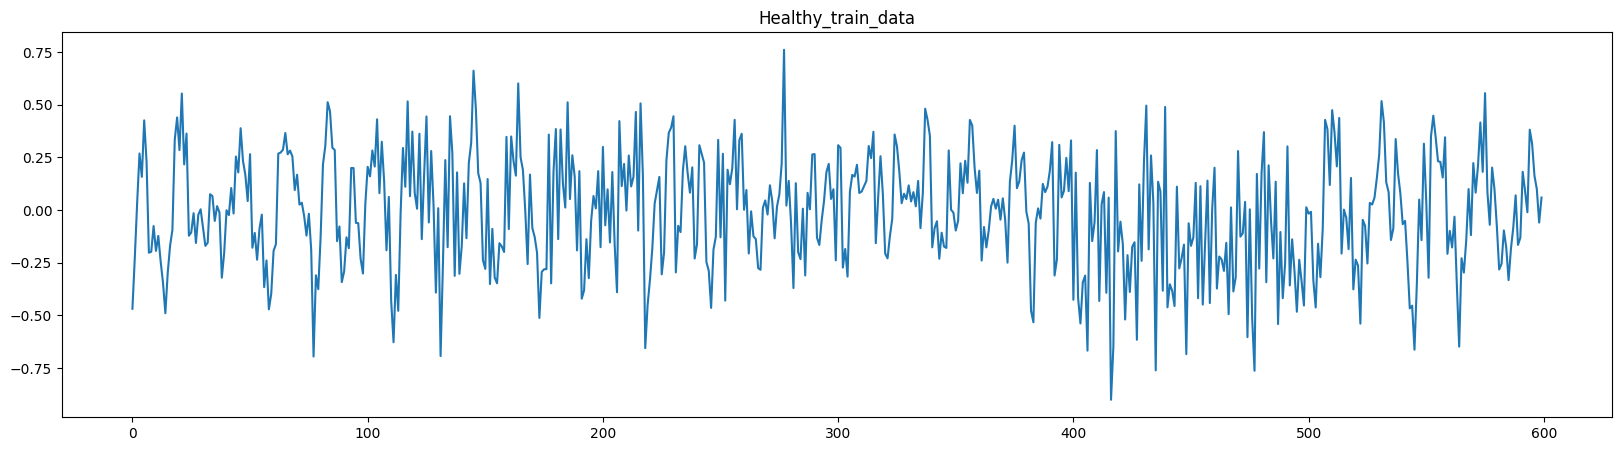

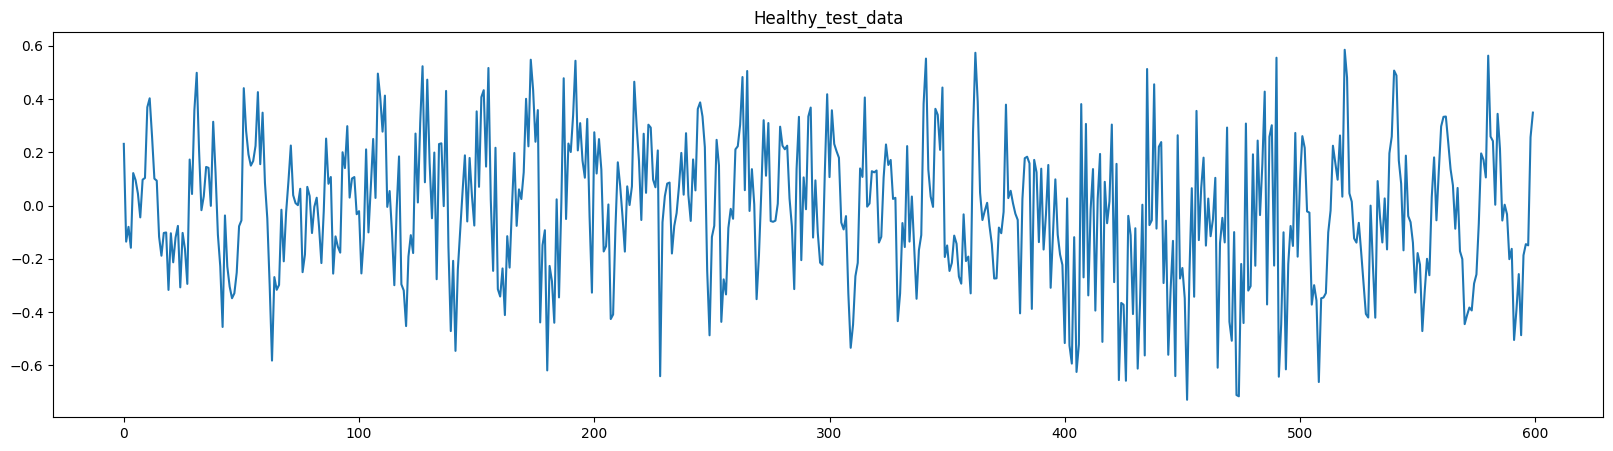

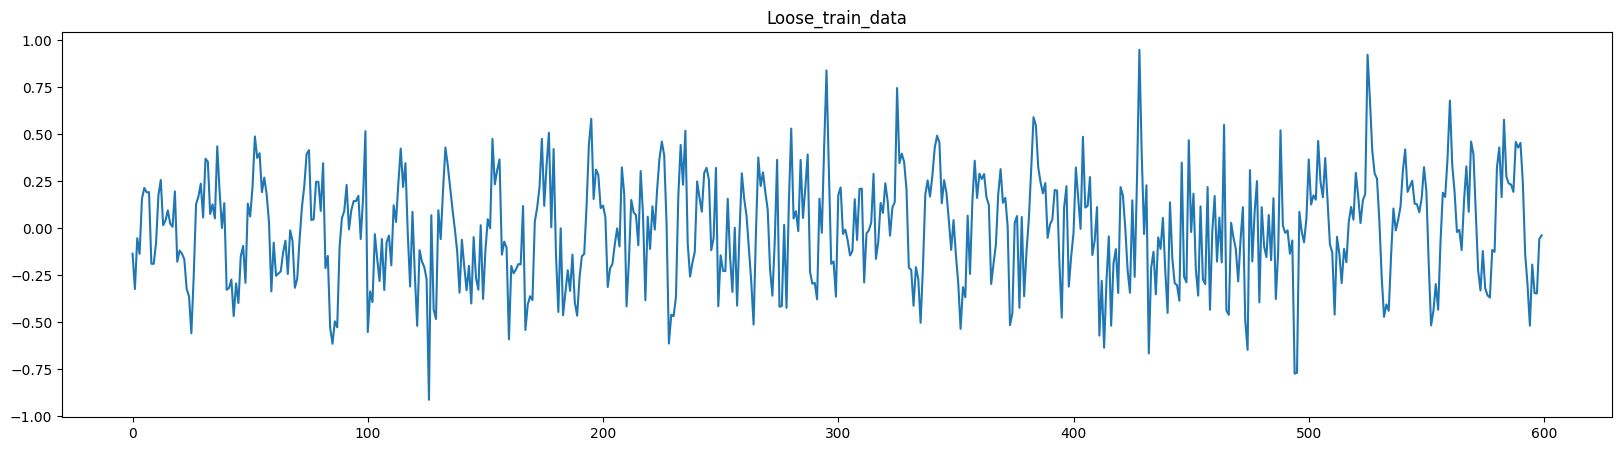

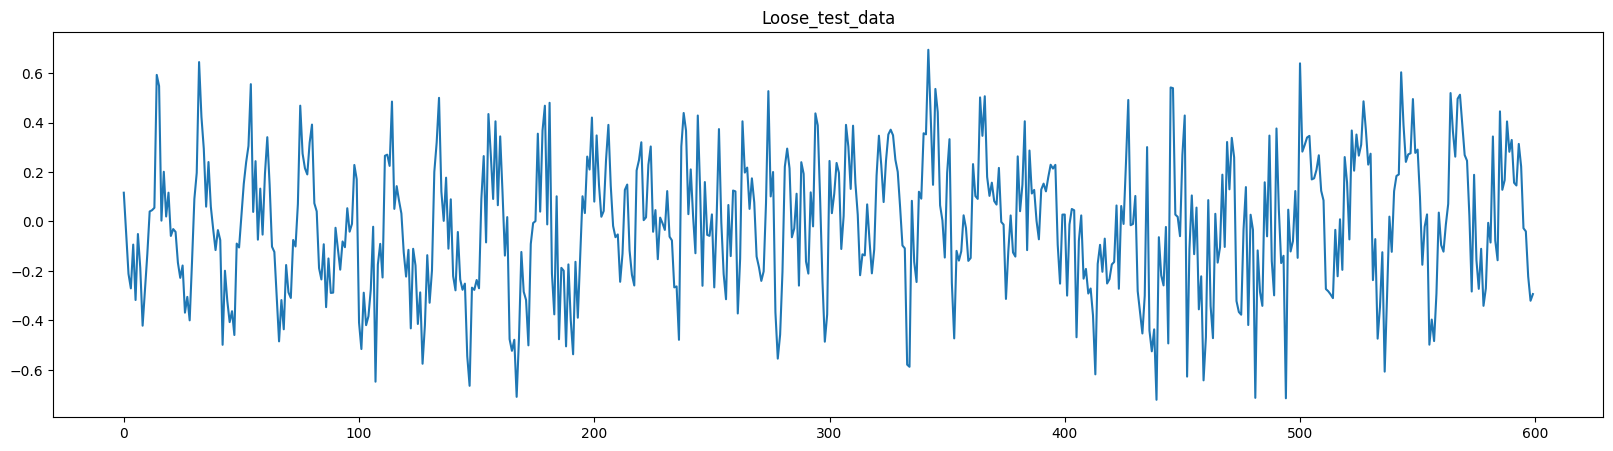

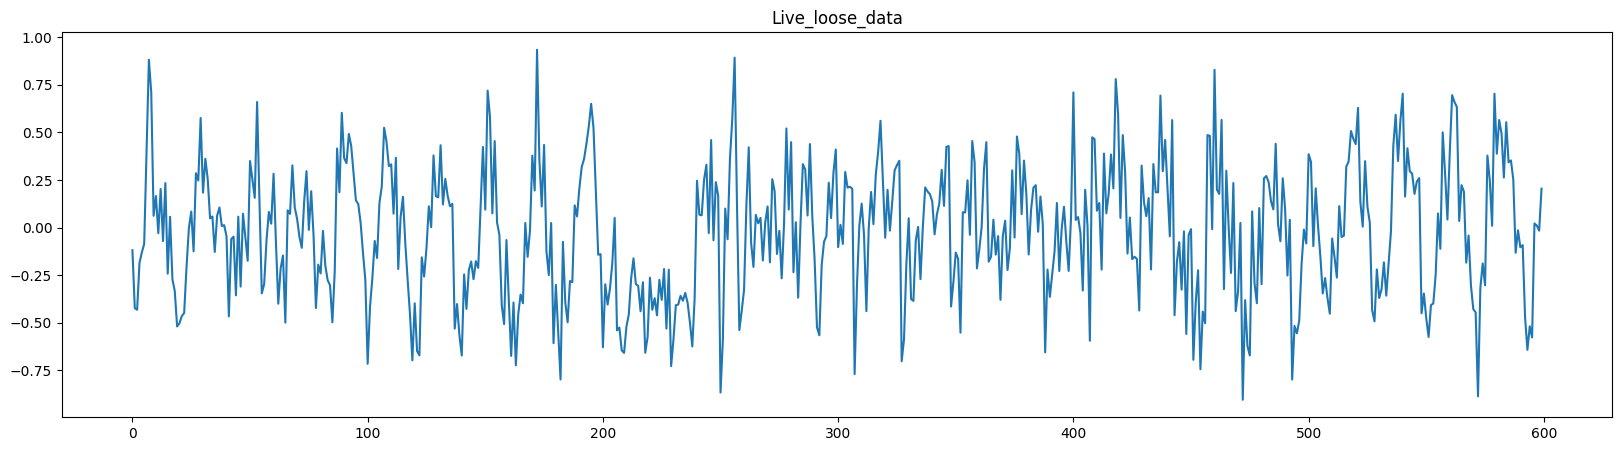

In [10]:
# Visualize the data for each label and segment
def plot_data(data, label):
    plt.figure(figsize=(20, 5))
    plt.title(label)
    plt.plot(data[0])
    plt.show()
    
plot_data(healthy_train_data_resized, "Healthy_train_data")
plot_data(healthy_test_data_resized, "Healthy_test_data")
# plot_data(live_healthy_data_resized, "Live_healthy_data")

plot_data(loose_train_data_resized, "Loose_train_data")
plot_data(loose_test_data_resized, "Loose_test_data")
plot_data(live_loose_data_resize, "Live_loose_data")

# plot_data(cavitation_test_data_resized, "Cavitation_test_data")
# plot_data(cavitation_train_data_resized, "Cavitation_train_data")

#### Training the autoencoder model on 6axis data

In [12]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Flatten, Reshape
from keras.layers import Conv1D, MaxPooling1D, UpSampling1D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# 1d convolutional autoencoder
cnn_autoencoder_model_input_size = healthy_train_data_resized.shape[1]
print(cnn_autoencoder_model_input_size)

cnn_autoencoder_model_input_layer = Input(shape=(cnn_autoencoder_model_input_size,))

cnn_autoencoder_model_encoder_layer = Sequential([
    Reshape((cnn_autoencoder_model_input_size, 1), input_shape=(cnn_autoencoder_model_input_size,)),
    Conv1D(filters=16, kernel_size=50, activation='elu'),
    # Dropout(0),
    Conv1D(filters=8, kernel_size=25, activation='elu'),
    # Dropout(0),
    MaxPooling1D(pool_size=4),
    Flatten(),
    # Dense(32, activation='elu')
])

cnn_autoencoder_model_decoder_layer = Sequential([
    # Dense(8, activation='elu'),
    # Dropout(0),
    # UpSampling1D(size=4),
    # Conv1D(filters=4, kernel_size=15, activation='elu'),
    # Dense(64, activation='elu'),
    Dense(32, activation='elu'),
    # Dropout(0),
    # Conv1D(filters=8, kernel_size=30, activation='elu'),
    # Flatten(),
    # Dropout(0),
    Dense(cnn_autoencoder_model_input_size, activation='tanh')
])

cnn_autoencoder_model_encoder_layer = cnn_autoencoder_model_encoder_layer(cnn_autoencoder_model_input_layer)
cnn_autoencoder_model_decoder_layer = cnn_autoencoder_model_decoder_layer(cnn_autoencoder_model_encoder_layer)

cnn_autoencoder_model = Model(inputs=cnn_autoencoder_model_input_layer, outputs=cnn_autoencoder_model_decoder_layer)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, mode="auto")

cnn_autoencoder_model.summary()

# Train the autoencoder
cnn_autoencoder_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


600
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 600)]             0         
                                                                 
 sequential_2 (Sequential)   (None, 1048)              4024      
                                                                 
 sequential_3 (Sequential)   (None, 600)               53368     
                                                                 
Total params: 57392 (224.19 KB)
Trainable params: 57392 (224.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
history_cnn_autoencoder = cnn_autoencoder_model.fit(loose_train_data_resized,
                                                    loose_train_data_resized,
                                                    batch_size=3000,
                                                    epochs=100,
                                                    verbose=1,
                                                    shuffle=True,
                                                    callbacks=[early_stopping],
                                                    validation_data=(loose_test_data_resized, loose_test_data_resized))

Epoch 1/100
19/19 [==============================] - 56s 3s/step - loss: 0.0750 - val_loss: 0.0637
Epoch 2/100
19/19 [==============================] - 55s 3s/step - loss: 0.0523 - val_loss: 0.0491
Epoch 3/100
19/19 [==============================] - 55s 3s/step - loss: 0.0450 - val_loss: 0.0454
Epoch 4/100
19/19 [==============================] - 53s 3s/step - loss: 0.0397 - val_loss: 0.0410
Epoch 5/100
19/19 [==============================] - 51s 3s/step - loss: 0.0350 - val_loss: 0.0385
Epoch 6/100
19/19 [==============================] - 50s 3s/step - loss: 0.0324 - val_loss: 0.0369
Epoch 7/100
19/19 [==============================] - 56s 3s/step - loss: 0.0308 - val_loss: 0.0356
Epoch 8/100
19/19 [==============================] - 55s 3s/step - loss: 0.0295 - val_loss: 0.0345
Epoch 9/100
19/19 [==============================] - 65s 3s/step - loss: 0.0285 - val_loss: 0.0336
Epoch 10/100
19/19 [==============================] - 63s 3s/step - loss: 0.0276 - val_loss: 0.0328
Epoch 11/

#### Evaluating the CNN autoencoder model

In [14]:
# Evaluate the model
reconstructed_data_loose_train = cnn_autoencoder_model.predict(loose_train_data_resized)

# Calculate the mean squared error
mse_loose_train_data_resized = np.mean(np.power(loose_train_data_resized - reconstructed_data_loose_train, 2), axis=1)

# Set the threshold to the 95th percentile of reconstruction errors
threshold = np.percentile(mse_loose_train_data_resized, 95)

print("Threshold: ", threshold)

1721/1721 [==============================] - 16s 9ms/step
Threshold:  0.024995237069054536


#### Plotting of results for 6axis data

1721/1721 [==============================] - 15s 9ms/step
Number of anomalies in baseline data: 2754 out of 55070 samples
Anomalies in baseline data: 5.000907935355003 %
1722/1722 [==============================] - 15s 9ms/step
Number of anomalies in test data: 55052 out of 55090 samples
Anomalies in test data: 99.93102196405881 %


C:\Users\jared\AppData\Local\Temp\ipykernel_11020\3581945503.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


1721/1721 [==============================] - 14s 8ms/step
Number of anomalies in baseline data: 2754 out of 55070 samples
Anomalies in baseline data: 5.000907935355003 %
1722/1722 [==============================] - 15s 9ms/step
Number of anomalies in test data: 33167 out of 55090 samples
Anomalies in test data: 60.20511889635143 %
1721/1721 [==============================] - 15s 9ms/step
Number of anomalies in baseline data: 2754 out of 55070 samples
Anomalies in baseline data: 5.000907935355003 %
1722/1722 [==============================] - 15s 9ms/step
Number of anomalies in test data: 55080 out of 55080 samples
Anomalies in test data: 100.0 %
1721/1721 [==============================] - 15s 9ms/step
Number of anomalies in baseline data: 2754 out of 55070 samples
Anomalies in baseline data: 5.000907935355003 %
85/85 [==============================] - 1s 10ms/step
Number of anomalies in test data: 2720 out of 2720 samples
Anomalies in test data: 100.0 %


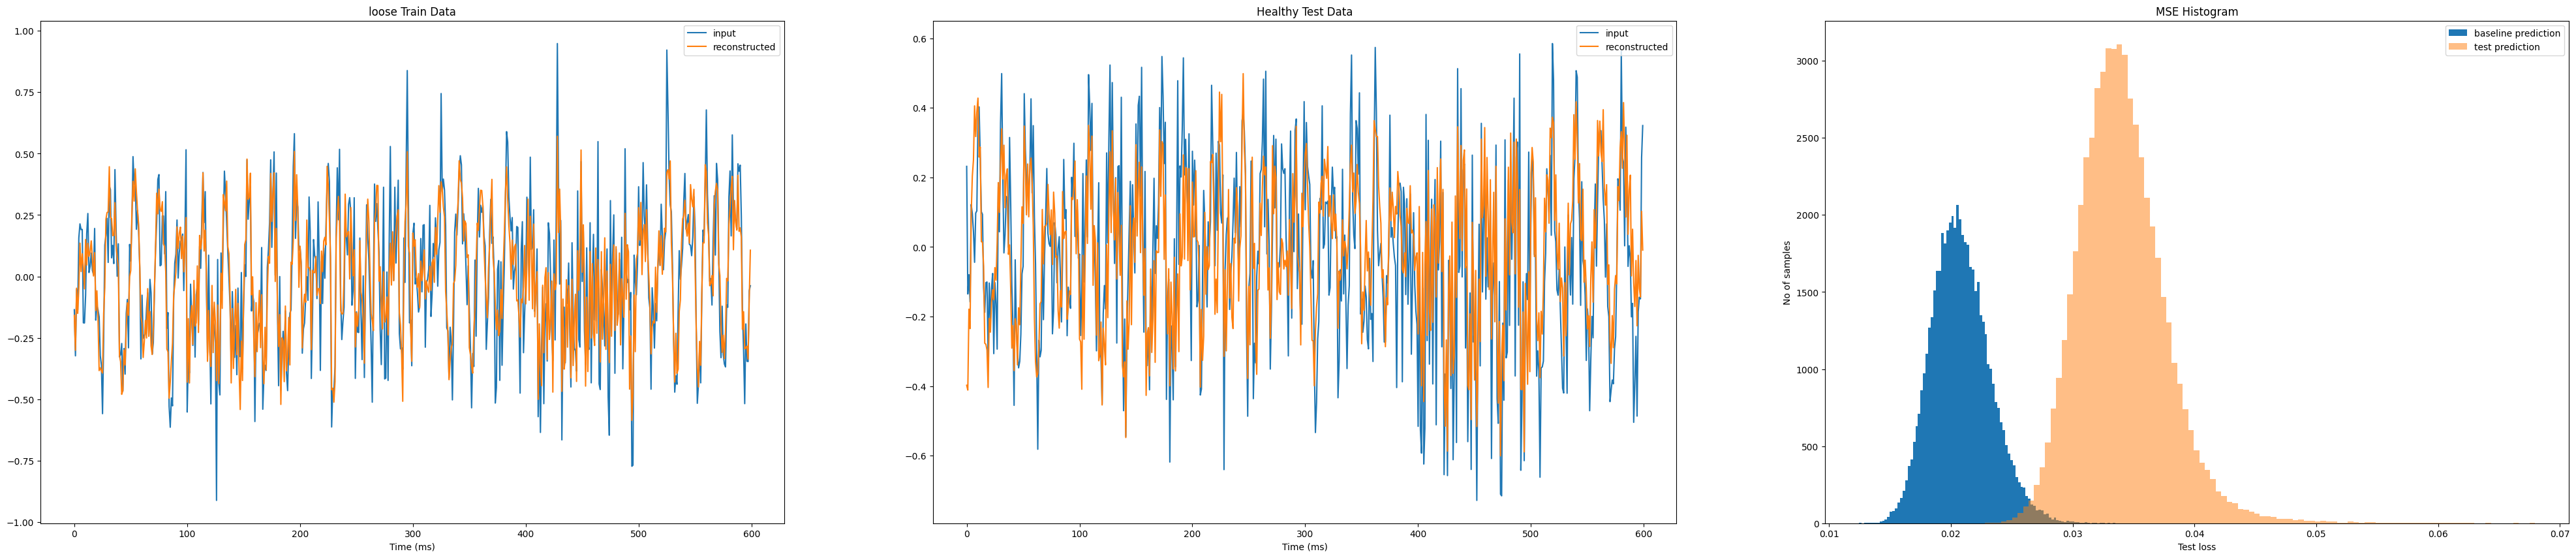

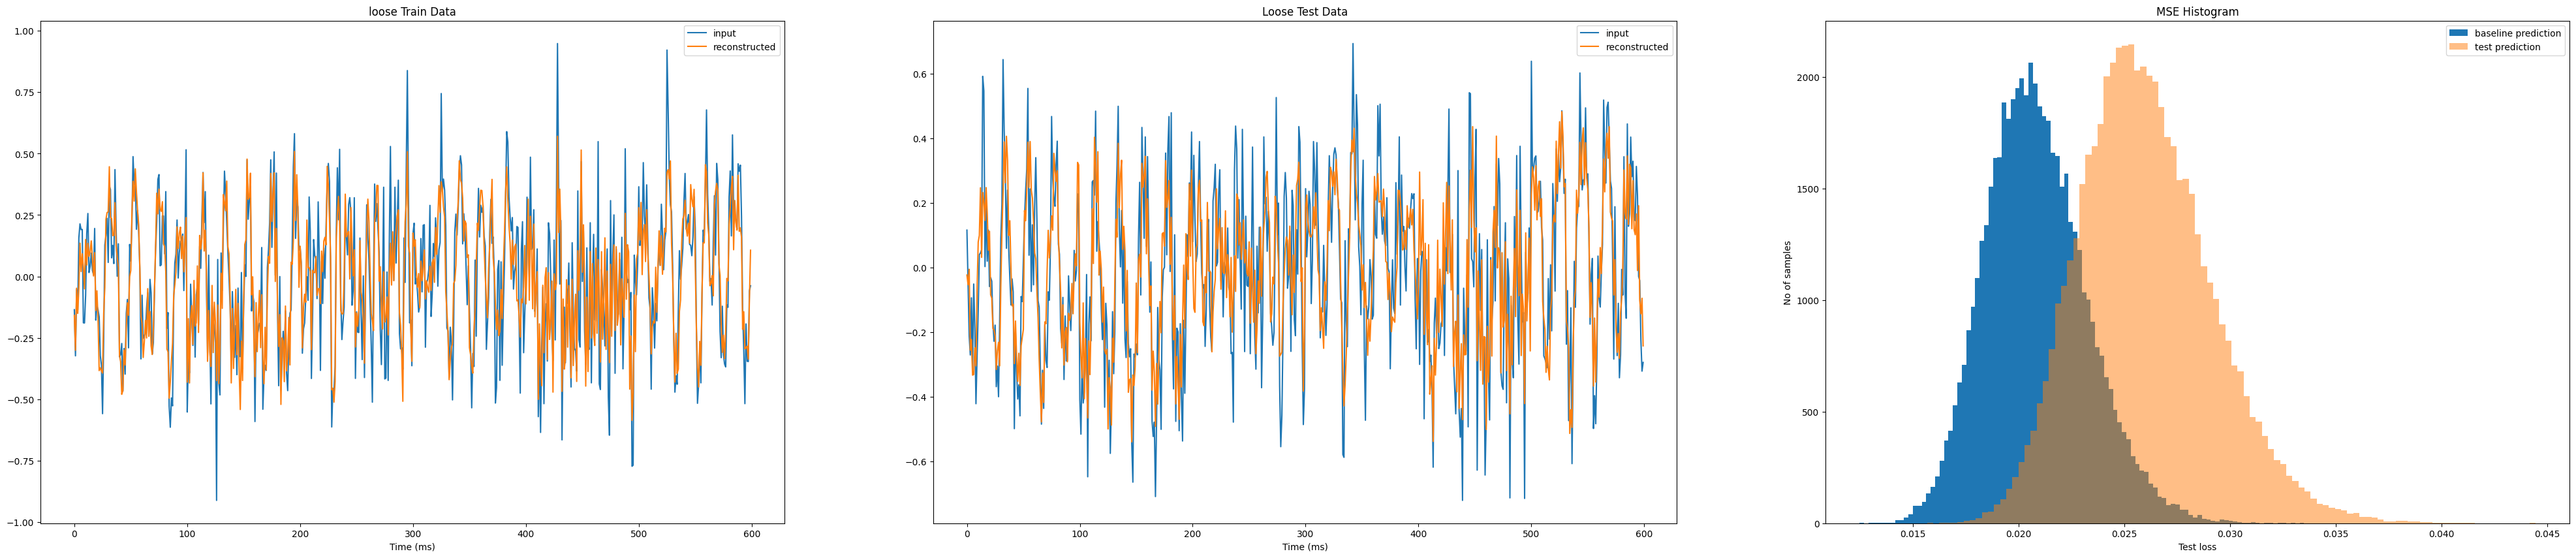

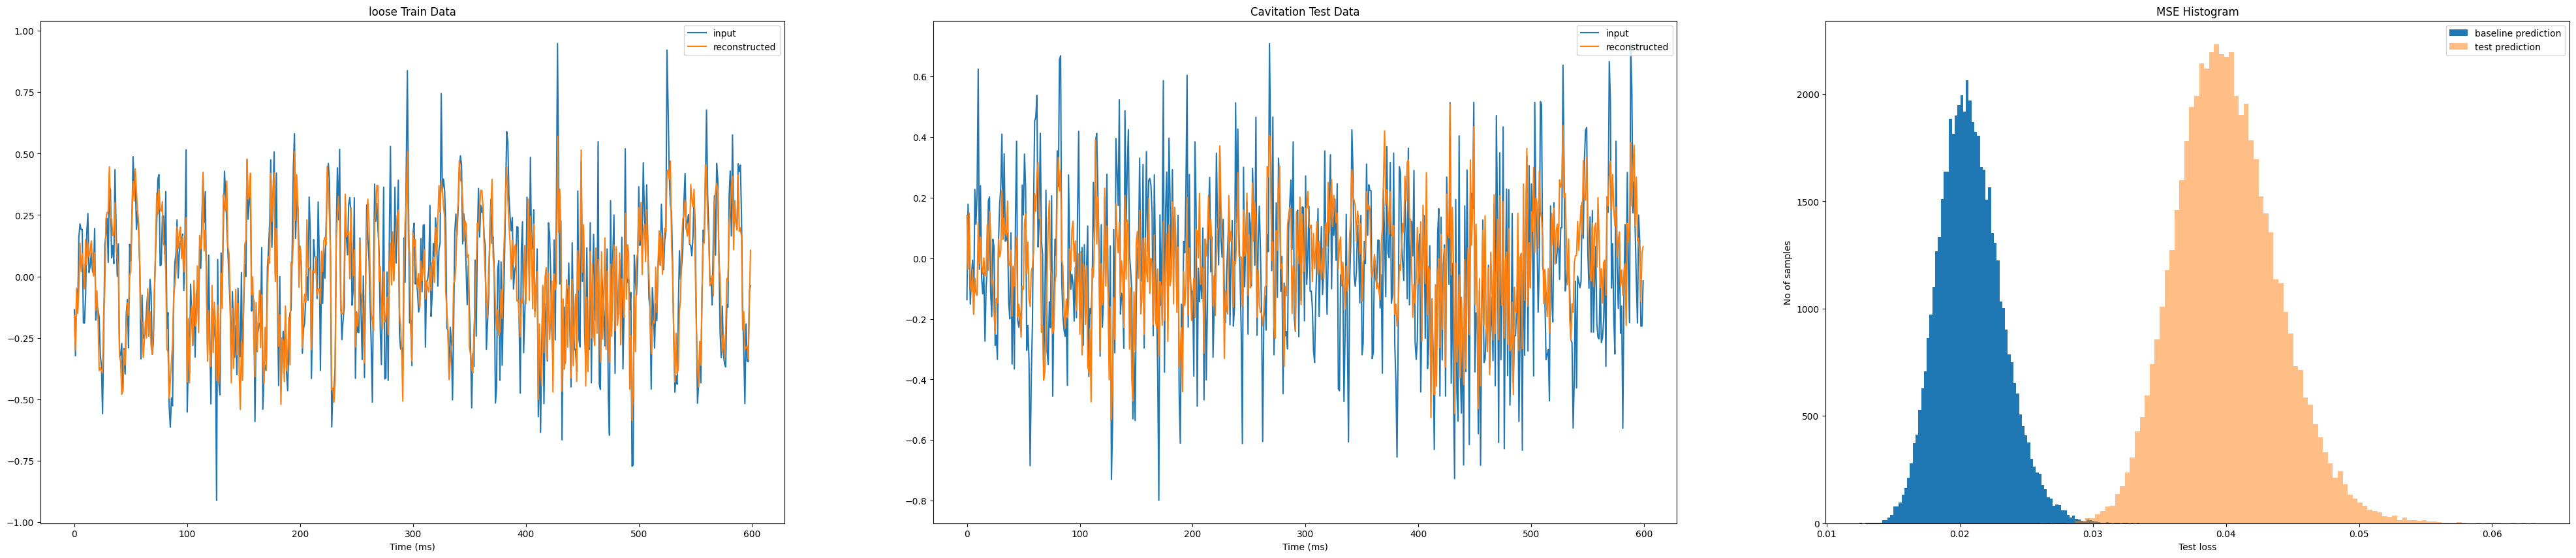

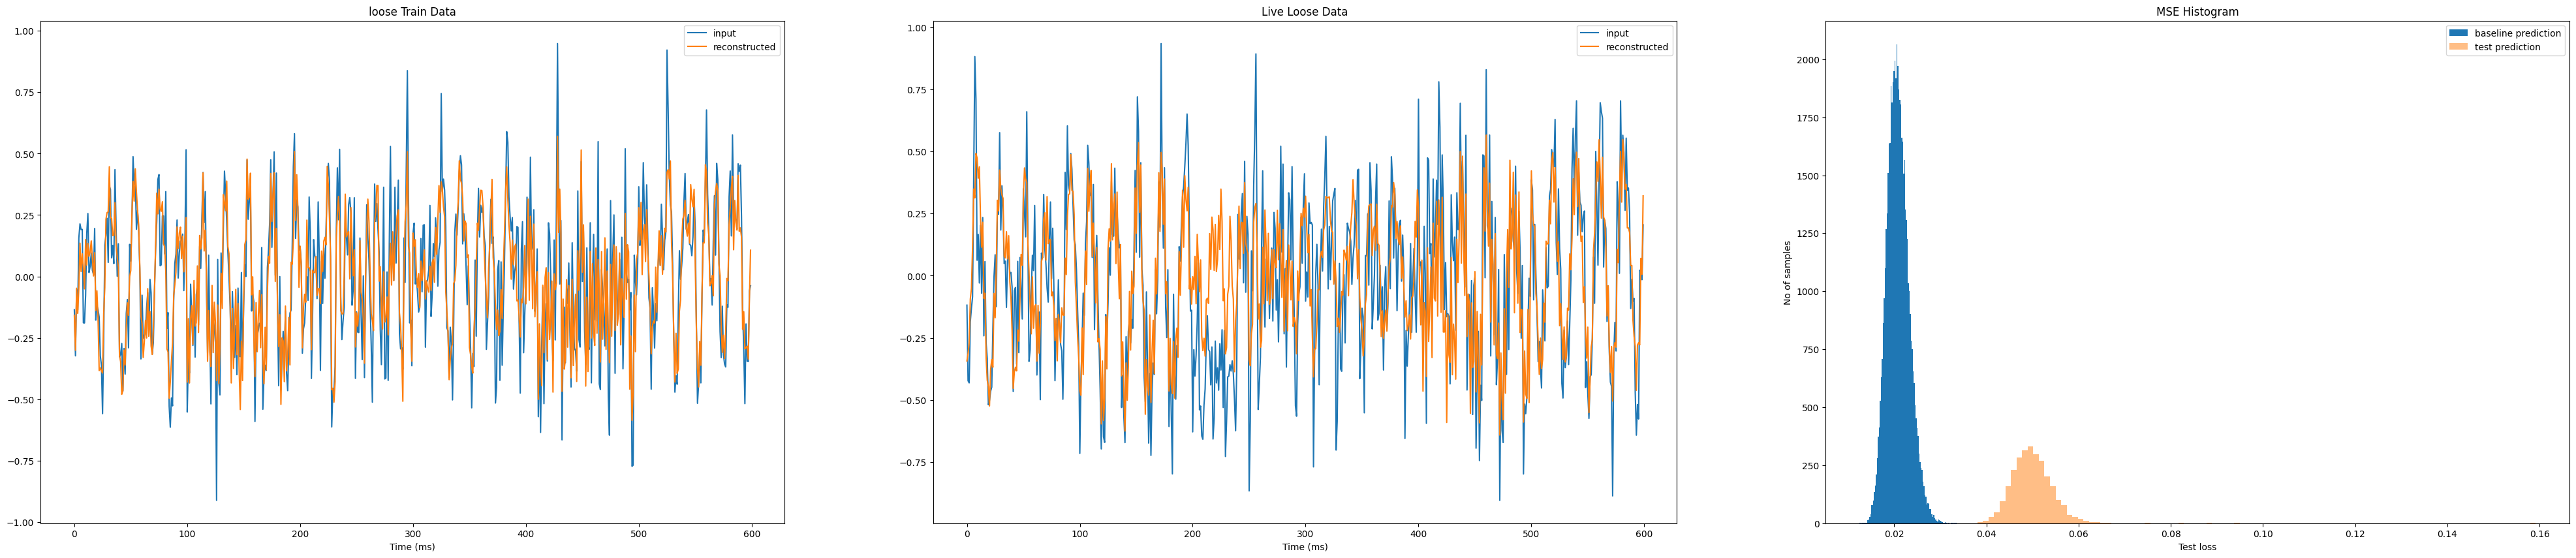

In [15]:
# Function for anomaly detection
def is_anomaly_6axis(data, model, threshold, title, ax, axpos):
    reconstructed_data = model.predict(data)
    
    ax[axpos].set_title(title)
    ax[axpos].plot(data[0, :], label='input')
    ax[axpos].plot(reconstructed_data[0, :], label='reconstructed')
    ax[axpos].set_xlabel("Time (ms)")
    ax[axpos].legend(loc='upper right')
    
    mse = np.mean(np.power(data - reconstructed_data, 2), axis = 1)
    return mse > threshold, mse

# Function for plotting the loss, anomalies, and MSE histogram
def plot_results_6axis(history, autoencoder, threshold, baseline_data, test_data, train_title, test_title):
    fig, ax = plt.subplots(1, 3, figsize=(50, 10))
    
    # # Plot training & validation loss values
    # ax[0].plot(history.history['loss'], label='Training Loss')
    # ax[0].plot(history.history['val_loss'], label='Validation Loss')
    # ax[0].set_title('Model Loss')
    # ax[0].set_ylabel('Loss')
    # ax[0].set_xlabel('Epoch')
    # ax[0].legend(loc='upper right')

    # Test with a new data point
    count_baseline = 0
    anomalies_baseline, mse_baseline = is_anomaly_6axis(baseline_data, autoencoder, threshold, train_title, ax, 0)

    for i in anomalies_baseline:
        if i == True:
            count_baseline += 1

    print("Number of anomalies in baseline data:", count_baseline, "out of", anomalies_baseline.size, "samples")
    print("Anomalies in baseline data:", (count_baseline / anomalies_baseline.size) * 100, "%")

    # Test unhealthy data
    anomalies_test, mse_test = is_anomaly_6axis(test_data, autoencoder, threshold, test_title, ax, 1)

    count_test = 0
    for i in anomalies_test:
        if i == True:
            count_test += 1

    print("Number of anomalies in test data:", count_test, "out of", anomalies_test.size, "samples")
    print("Anomalies in test data:", (count_test / anomalies_test.size) * 100, "%")

    # plot mse histogram
    ax[2].set_title("MSE Histogram")
    ax[2].hist(mse_baseline, bins=100, label='baseline prediction')
    ax[2].hist(mse_test, bins=100, label='test prediction', alpha=0.5)
    ax[2].set_xlabel("Test loss")
    ax[2].set_ylabel("No of samples")
    ax[2].legend(loc='upper right')
    fig.show()
    
plot_results_6axis(history_cnn_autoencoder, cnn_autoencoder_model, threshold, loose_train_data_resized, healthy_test_data_resized, "loose Train Data", "Healthy Test Data")
plot_results_6axis(history_cnn_autoencoder, cnn_autoencoder_model, threshold, loose_train_data_resized, loose_test_data_resized, "loose Train Data", "Loose Test Data")
plot_results_6axis(history_cnn_autoencoder, cnn_autoencoder_model, threshold, loose_train_data_resized, cavitation_test_data_resized, "loose Train Data", "Cavitation Test Data")
# plot_results_6axis(history_cnn_autoencoder, cnn_autoencoder_model, threshold, healthy_train_data_resized, live_healthy_data_resized, "Healthy Train Data", "Live Healthy Data")
plot_results_6axis(history_cnn_autoencoder, cnn_autoencoder_model, threshold, loose_train_data_resized, live_loose_data_resize, "loose Train Data", "Live Loose Data")



#### Saving model as tflite model

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tinymlgen import port

from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

# def cnn_representative_dataset():
#     for val in X_test:
#         val = np.expand_dims(val, axis=1)
#         yield [np.array(val, dtype=np.float32)]
        
def cnn_representative_dataset():
  for data in tf.data.Dataset.from_tensor_slices(healthy_train_data_resized).batch(1).take(100):
    # Model has only one input so each data point has one element.
    data = np.expand_dims(data, axis=-1)
    yield [tf.dtypes.cast(data, tf.float32)]

# def cnn_representative_dataset():
#     for data in tf.data.Dataset.from_tensor_slices(X_test).batch(1).take(1000):
#         yield [tf.dtypes.cast(data, tf.float32)]   

# Full integer quantization for healthy2 data (Y-axis)
fullint_converter_cnn = tf.lite.TFLiteConverter.from_keras_model(cnn_autoencoder_model)
fullint_converter_cnn.optimizations = [tf.lite.Optimize.DEFAULT]
fullint_converter_cnn.representative_dataset = cnn_representative_dataset
fullint_tflite_model_cnn = fullint_converter_cnn.convert()

# Save the models
open("cnn_classification_fullint_quantized.tflite", "wb").write(fullint_tflite_model_cnn)


INFO:tensorflow:Assets written to: C:\Users\jared\AppData\Local\Temp\tmp9qhtmgak\assets


INFO:tensorflow:Assets written to: C:\Users\jared\AppData\Local\Temp\tmp9qhtmgak\assets
c:\Users\jared\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\lite\python\convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


45688

#### Copy paste the following lines to run on bash cmdline

xxd -i Original_healthy_model_fullint_quantized.tflite > Original_healthy_model_fullint_quantized.cc  
xxd -i Healthy2_model_fullint_quantized.tflite > Healthy2_model_fullint_quantized.cc  
xxd -i Healthy3_model_fullint_quantized.tflite > Healthy3_model_fullint_quantized.cc
xxd -i cnn_fullint_quantized.tflite > cnn_fullint_quantized.cc


In [24]:
# For evaluating TFLite micro models against the test data
def evaluate_model_y_axis(interpreter, dataset, calculated_threshold):
    # Get input and output tensors.
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    num_test_samples = dataset.shape[0]
    # print("Dataset shape: ", dataset.shape)

    # Run predictions on every set in the "test" dataset.
    reconstructed_data = []
    for i in range(num_test_samples):

        # Pre-processing the data to fit it with the model's input.
        input_data = np.array(dataset[i], dtype=np.float32)
        # print("Input data shape:", input_data.shape)
        input_data = np.expand_dims(input_data, axis=0)
        # print("Input data shape after expand_dims:", input_data.shape)
        interpreter.set_tensor(input_details[0]['index'], input_data)

        # Run inference.
        interpreter.invoke()

        # Post-processing: remove batch dimension and find the digit with highest
        # probability.
        output_data = interpreter.get_tensor(output_details[0]['index'])
        reconstructed_data.append(output_data[0])

    # Convert to numpy array from list for easier comparison
    reconstructed_data = np.array(reconstructed_data)

    mse = np.mean(np.power(dataset - reconstructed_data, 2), axis=1)

    anorm_count = 0
    for i in range(num_test_samples):
        if mse[i] > calculated_threshold:
            anorm_count += 1
    
    return np.array(reconstructed_data), mse, anorm_count

#### Evaluating the CNN model (6 axis)

In [62]:
cnn_interpreter = tf.lite.Interpreter(model_path='cnn_fullint_quantized.tflite')
cnn_interpreter.allocate_tensors()
cnn_input_details = cnn_interpreter.get_input_details()[0]
cnn_output_details = cnn_interpreter.get_output_details()[0]

# Helper function to run inference on a TFLite model
def run_tflite_model(tflite_file, y_test_indices, X_test, y_test):
  predictions = np.zeros((len(y_test_indices),), dtype=int)
  for i, y_test_index in enumerate(y_test_indices):
    test_image = X_test[y_test_index]
    test_label = y_test[y_test_index]

    # Add a new dimension to the input tensor to match the expected shape
    test_image = np.expand_dims(test_image, axis=0)
    test_image = np.expand_dims(test_image, axis=-1)
    test_image = test_image.astype(cnn_input_details["dtype"])

    cnn_interpreter.set_tensor(cnn_input_details["index"], test_image)
    cnn_interpreter.invoke()
    output = cnn_interpreter.get_tensor(cnn_output_details["index"])[0]

    predictions[i] = output.argmax()

  return predictions

## Helper function to test the models on one sample
def test_model(tflite_file, y_test_index, X_test, y_test):
  predictions = run_tflite_model(tflite_file, [y_test_index], X_test, y_test)
  for result in predictions:
    print("Prediction: ", result)
    print("Actual: ", y_test[y_test_index].argmax())
    
# Helper function to evaluate a TFLite model on all images
def evaluate_cnn_model(tflite_file, X_test, y_test):
  y_test_categories = y_test.argmax(axis=1)
  
  y_test_indexes = range(y_test.shape[0])
  predictions = run_tflite_model(tflite_file, y_test_indexes, X_test, y_test)

  accuracy = (np.sum(y_test_categories == predictions) * 100) / len(y_test)
  
  print("Number of correct predictions: ", np.sum(y_test_categories == predictions))
  print("Number of wrong predictions: ", np.sum(y_test_categories != predictions))
  print("Model accuracy is %.2f%% (Number of test samples=%d)" % (accuracy, len(y_test_categories)))

print("Evaluating CNN model using test data:")
evaluate_cnn_model('cnn_fullint_quantized.tflite', X_test, y_test)
print("--------------------------------------------")
print("Evaluating CNN model using hidden data:")
evaluate_cnn_model('cnn_fullint_quantized.tflite', X_hidden, OHE_Y_hidden)
print("--------------------------------------------")

Evaluating CNN model using test data:
Number of correct predictions:  59419
Number of wrong predictions:  1112
Model accuracy is 98.16% (Number of test samples=60531)
Evaluating CNN model using hidden data:
Number of correct predictions:  92383
Number of wrong predictions:  8501
Model accuracy is 91.57% (Number of test samples=100884)


### Using Talos to check hyper parameter

Reference: https://github.com/autonomio/talos/blob/master/examples/Hyperparameter%20Optimization%20with%20Keras%20for%20the%20Iris%20Prediction.ipynb


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from keras.models import Model
# from keras.layers import Input, Dense, LeakyReLU, Conv1D, MaxPooling1D, UpSampling1D
# from keras.optimizers import Adam, Nadam
# from keras.callbacks import EarlyStopping
# from keras.losses import mse as mse_loss
# from keras import Sequential
# from keras.layers import Dropout
# from keras.regularizers import l1, l2

# # Step 2: Split the data
# X_train, X_test = train_test_split(data_healthy_vert_normalised[1], test_size=0.20, random_state=42)

# def AR_talos_model(x_train, y_train, x_val, y_val, params):
#     input_size = x_train.shape[1]

#     input_layer = Input(shape=(input_size,))
#     encoder_layer = Sequential([
#         Dense(params['first_layer'], activation=params['activation']),
#         Dropout(params['dropout']),
#         Dense(params['second_layer'], activation=params['activation']),
#         Dropout(params['dropout']),
#         Dense(params['third_layer'], activation=params['activation'])
#     ])

#     decoder_layer = Sequential([
#         Dense(params['third_layer'], activation=params['activation']),
#         Dropout(params['dropout']),
#         Dense(params['second_layer'], activation=params['activation']),
#         Dropout(params['dropout']),
#         Dense(input_size, activation='sigmoid')
#     ])

#     encoder_layer = encoder_layer(input_layer)
#     decoder_layer = decoder_layer(encoder_layer)

#     autoencoder = Model(inputs=input_layer, outputs=decoder_layer)

#     early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode="auto")

#     # Step 4: Train the autoencoder
#     autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

#     # Train the autoencoder with the EarlyStopping callback
#     history = autoencoder.fit(
#         x_train, x_train,
#         epochs=params['epochs'],
#         batch_size=params['batch_size'],
#         validation_data=(x_val, x_val),
#         callbacks=[early_stopping],
#         verbose=1
#     )
    
#     return history, autoencoder


In [ ]:
# # Creating dict to use talos to do hyperparameter tuning
# p = dict(
# 	first_layer=[32, 48, 64],
#     second_layer=[32, 48, 64],
#     third_layer=[32, 48, 64],
# 	activation=['relu', 'elu'],
# 	epochs=[50, 100, 200, 500],
# 	batch_size=[64, 128, 256, 512],
#     dropout=[0, 0.01, 0.1, 0.15],
# )

In [ ]:
# import talos

# t = talos.Scan(X_train, 
#                X_train, 
#                params=p, 
#                model=AR_talos_model, 
#                experiment_name='AR_talos_model', 
#                fraction_limit=0.01, # Fraction of hyperparameter combinations to try
#                print_params=True, 
#                round_limit=1)

In [ ]:
# # Acessing the results data frame
# t.data.head()

# # Accessing epoch entropy values for each round
# t.learning_entropy

# # Access the summary details
# t.details

experiment_name          AR_talos_model
random_method          uniform_mersenne
reduction_method                   None
reduction_interval                   50
reduction_window                     20
reduction_threshold                 0.2
reduction_metric                val_acc
experiment_id              091923193350
complete_time            09/19/23/20:39
x_shape                    (39200, 100)
y_shape                    (39200, 100)
dtype: object

In [ ]:
# analyze_object = talos.Analyze(t)

In [ ]:
# access the dataframe with the results
# analyze_object.data

,start,end,duration,round_epochs,loss,val_loss,first_layer,second_layer,third_layer,activation,epochs,batch_size,dropout
0,09/19/23-193351,09/19/23-193519,88.645478,84,0.014765,0.012999,64,64,64,relu,500,256,0.15
1,09/19/23-193520,09/19/23-193614,54.514668,50,0.005842,0.005081,64,32,64,elu,50,256,0.01
2,09/19/23-193615,09/19/23-193941,206.040746,200,0.004498,0.004513,48,48,64,relu,200,128,0.00
3,09/19/23-193941,09/19/23-194000,18.943502,31,0.017750,0.016012,32,32,64,relu,100,512,0.10
4,09/19/23-194000,09/19/23-194119,78.844273,200,0.003968,0.003961,48,48,48,elu,200,512,0.00
5,09/19/23-194119,09/19/23-194152,32.272145,67,0.015749,0.012196,32,32,32,elu,500,512,0.15
6,09/19/23-194152,09/19/23-194307,74.528511,97,0.011257,0.007977,48,48,32,elu,100,256,0.10
7,09/19/23-194307,09/19/23-200044,1057.296577,176,0.005154,0.004473,32,48,48,elu,500,256,0.01
8,09/19/23-200044,09/19/23-200240,115.170355,100,0.005068,0.004493,32,64,48,elu,200,128,0.01
9,09/19/23-200240,09/19/23-200335,54.760252,50,0.004884,0.004145,48,48,48,elu,50,128,0.01


In [ ]:
# # get the number of rounds in the Scan
# analyze_object.rounds()

# # get the highest result for any metric
# analyze_object.high('val_loss')

# # get the round with the best result
# analyze_object.rounds2high('loss')

# # get the best paramaters
# # analyze_object.best_params('val_loss', ['loss', 'val_loss'])

# # get correlation for hyperparameters against a metric
# # analyze_object.correlate('val_loss', ['loss', 'val_loss'])

30

In [ ]:
# # a regression plot for two dimensions 
# analyze_object.plot_regs('loss', 'val_loss')

# # line plot
# analyze_object.plot_line('val_loss')

# # up to two dimensional kernel density estimator
# analyze_object.plot_kde('val_loss')

# # a simple histogram
# analyze_object.plot_hist('val_loss', bins=50)

# # heatmap correlation
# analyze_object.plot_corr('val_loss', ['loss', 'val_loss'])

# # a four dimensional bar grid
# analyze_object.plot_bars('batch_size', 'val_loss', 'first_neuron', 'lr')